# Aprendizaje de maquinas  -- R -- Sistemas de Recomendación.
Notas de clase sobre aprendizaje de maquinas usando R

**Juan David Velásquez Henao**   
jdvelasq@unal.edu.co  
Universidad Nacional de Colombia, Sede Medellín  
Facultad de Minas  
Medellín, Colombia  

[Licencia]

[Readme]

**Software utilizado**.

> Este es un documento interactivo escrito como un notebook de [Jupyter](http://jupyter.org), en el cual se presenta un tutorial sobre regresión logistica usando **R** en el contexto de aprendizaje de maquinas. Los notebooks de Jupyter permiten incoporar simultáneamente código, texto, gráficos y ecuaciones. El código presentado en este notebook puede ejecutarse en los sistemas operativos Linux y OS X.

> Haga click [aquí](https://github.com/jdvelasq/guias-de-instalacion) para obtener instrucciones detalladas sobre como instalar Jupyter en Windows y Mac OS X.

> Haga clic [aquí] para ver la última versión de este documento en nbviewer.

> Descargue la última versión de este documento a su disco duro; luego, carguelo y ejecutelo en línea en [Try Jupyter!](https://try.jupyter.org)

> Haga clic [aquí](https://github.com/jdvelasq/ETVL-R/blob/master/ETVL-R-5-visualizacion-1-base.ipynb) para ver el tutorial de visualización y gráficas.

#### Contenido

>* [Introducción](#Introducción)
* [Sistemas de Recomendación Basados en Usuarios](#Sistemas-de-Recomendación-Basados-en-Usuarios)
* [Sistemas de Recomendación Basados en Items](#Sistemas-de-Recomendación-Basados-en-Items)
* [Aplicación 1](#Aplicación-1)

**Bibliografía**.

>  

**Material complementario.**
> Webinar RStudio [Getting your data into R](https://www.rstudio.com/resources/webinars/getting-your-data-into-r/) 

---



# Introducción
[Contenido](#Contenido)

Las **recomendaciones** se han convertido en uno de los insumos básicos de servicios de comercio y servicios en línea. Recomendar libros, articulos, peliculas o canciones puede estimular el consumo y, por tanto, la venta de este. Este tipo de sistema automatizado puede proporcionar a cada usuario una lista personalizada de sugerencias (ya sea una lista de productos para la compra, características de uso, o nuevas conexiones). Los sistemas de recomendaciones aplican estadística y técnicas de descubrimiento de conocimiento para predecir recomendaciones basados en data ya recolectada. 

Existen dos tipos de sistemas de recomendación: ***Basados en contenido y filtrado colaborativo***. 

El primero tipo de enofque se basa en la idea de que si se puede obtener la estructura de las preferencias de un usuario en cuanto a un producto, entonces podemos recomendar otros productos con los atributos similares a los más preferidos por el usuario.

El segundo tipo de sistema de recomendación está basado en los aportes de los consumidores a menudo recibe el nombre filtrado colaborativo, debido a que los usuarios ***colaboran*** a través del sistema para encontrar los mejores artículos para los demas consumidores. La idea es que dado los datos de calificaciones de los usuarios a los items se pueden encontrar usuarios similiares que le gusten cierto tipo de producto, o ciertos tipos de productos que le gusten a la misma persona.

# Sistemas de Recomendación Basados en Usuarios
[Contenido](#Contenido)

Son algoritmos basados en memoria que intenta imitar el boca a boca mediante el análisis de los datos de calificación de muchos individuos. El supuesto es que los usuarios con preferencias similares se calificaría productos (items) de manera similar. Por lo tanto, las calificaciones faltantes para un usuario se puede predecir mediante la búsqueda de una vecindad primaria entre los usuarios y similares y por último se agregan las calificaciones de estos usuarios para formar una predicción.

<img src="images/Captura.jpg" height="600" width="600">

Las vecindades se definen en términos de similaridad y algortimos de clustering como k-means, k-medians u otro tipo de modelo de agrupación. Es de recordar que la medidad de distancia es importante dentro del modelo ya que se pueden usar distancias euclidianas, **correlaciones, coseno** o manhattan.

Luego de realizar la segmentación, los ratings son agregados para calcular el valor de predicción por el algoritmo como la media del rating dentro del cluster para el item.

$$ \hat{r_{aj}} = \frac{1}{| N(a) |} \sum_{i \in N(a)} r_{ij} $$

Donde $ \hat{r_{aj}} $ es la predicción del cluster a al item j, $ N(a) $ es el conjunto de usuarios en el cluster a y $r_{ij}$ es la calificación del usuario i al item j 

Usualmente normalizar los datos antes de aplicar los algortimos pueden mejorar el sesgo del modelo, ya que tienden a darle menos peso a aquellos usuarios que siempre están calificando alto o siempre califican bajo a los items. Para esto se puede utilizar las técnicas de normalización ya vistas en el Notebook de Clustering.

# Sistemas de Recomendación Basados en Items
[Contenido](#Contenido)

Es un enfoque basado en los modelos que produce recomendaciones basadas en la relación entre los elementos parecidos e inferidas a partir de la matriz de calificación. La suposición detrás de este enfoque es que los usuarios preferirán artículos que son similares a otros artículos que les gusta.

Este algoritmo calcula la similaridad entre todos los items utilizando una medida de distancia, es decir, calcula clusters dentro de los items.

Para hacer recomendaciones, se calcula la suma ponderada de las calificaciones para los items similares.

$$ \hat{r_{ai}} = \frac{1}{\sum_{j \in S(i) \cap \{l;r_{ai}\neq?\}} s_{ij}} \sum_{j \in S(i) \cap \{l;r_{ai}\neq?\}} s_{ij} r_{aj}$$

Donde $ \hat{r_{aj}} $ es la predicción del cluster a al usuario i, $ S(i) $ es el conjunto de items en el cluster i, $r_{aj}$ es la calificación del cluster a al item j, $s_{ij}$ es la similaridad (suma ponderada) del usuario i al item j. 

<img src="images/IBCF.png" height="400" width="400">

# Aplicación 1
[Contenido](#Contenido)

En 2006, Netflix publicó una base de datos con un gran número de calificaciones de peliculas por parte de los clientes para realizar un desafío público. El objetivo era mejorar en su algoritmo interno para la predicción de calificaciones. Desafortunadamente, por razones legales, el conjunto de datos que se habilitó para desarrollar el Premio Netflix ya no está disponible. Sin embargo, se utilizará un conjunto de dato académicos con características similares. Estos datos provienen del grupo Lens (GroupLens), un laboratorio de investigación de la Universidad de Minnesota.

> [`recommenderlab {recommenderlab}`](https://cran.r-project.org/web/packages/recommenderlab/vignettes/recommenderlab.pdf) 

> [`ggplot2 {ggplot2}`](https://cran.r-project.org/web/packages/ggplot2/ggplot2.pdf) 

In [1]:
## Cargue las librerías necesarias
library(recommenderlab)
library(ggplot2)

## Cargue la data de MovieLense
data(MovieLense)

## Vista de los primeros registros de la data
head(as(MovieLense[1,], "list")[[1]])

Loading required package: Matrix
Loading required package: arules

Attaching package: 'arules'

The following objects are masked from 'package:base':

    abbreviate, write

Loading required package: proxy

Attaching package: 'proxy'

The following object is masked from 'package:Matrix':

    as.matrix

The following objects are masked from 'package:stats':

    as.dist, dist

The following object is masked from 'package:base':

    as.matrix

Loading required package: registry


Toy Story (1995) 
                                                   5 
                                    GoldenEye (1995) 
                                                   3 
                                   Four Rooms (1995) 
                                                   4 
                                   Get Shorty (1995) 
                                                   3 
                                      Copycat (1995) 
                                                   3 
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) 
                                                   5

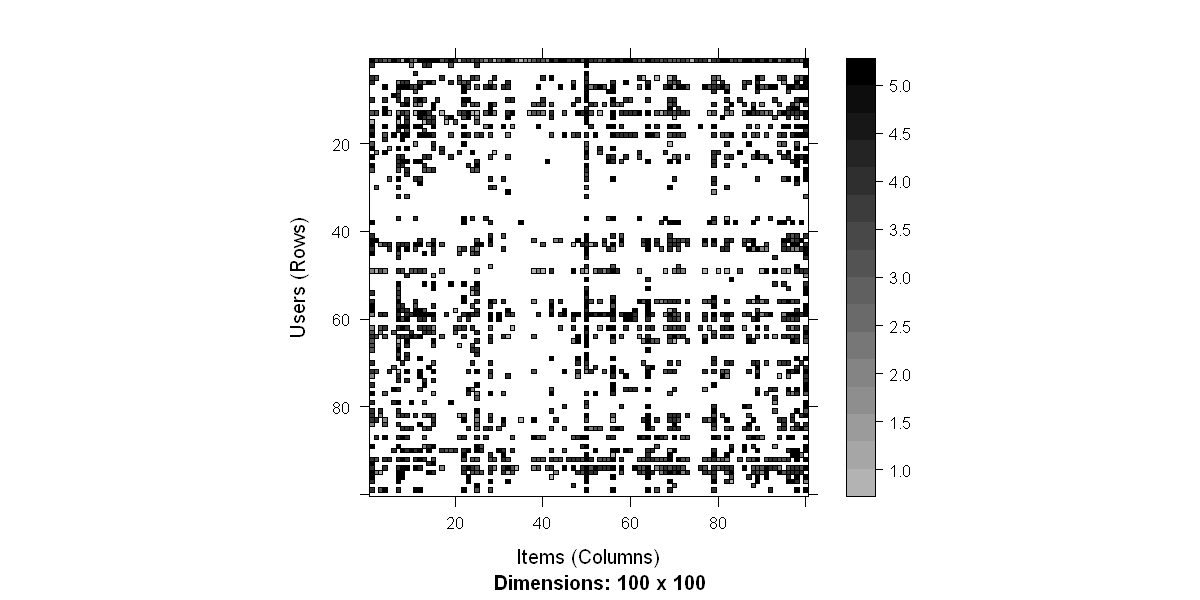

In [2]:
## Visualice parte de la matriz 
options(repr.plot.width=10, repr.plot.height=5)
image(MovieLense[1:100,1:100]) 

Puede observar que existe una lista del nombre de las peliculas con las calificaciones asignadas por cada usuario. Existen muchos usuarios que no califican los filmes, por eso en la imagen de la matriz puede observar tanto espacio blanco. A este tipo de matriz se le conoce como **sparse**.

In [3]:
# Estructura de la data
str(MovieLense)

Formal class 'realRatingMatrix' [package "recommenderlab"] with 2 slots
  ..@ data     :Formal class 'dgCMatrix' [package "Matrix"] with 6 slots
  .. .. ..@ i       : int [1:99392] 0 1 4 5 9 12 14 15 16 17 ...
  .. .. ..@ p       : int [1:1665] 0 452 583 673 882 968 994 1386 1605 1904 ...
  .. .. ..@ Dim     : int [1:2] 943 1664
  .. .. ..@ Dimnames:List of 2
  .. .. .. ..$ : chr [1:943] "1" "2" "3" "4" ...
  .. .. .. ..$ : chr [1:1664] "Toy Story (1995)" "GoldenEye (1995)" "Four Rooms (1995)" "Get Shorty (1995)" ...
  .. .. ..@ x       : num [1:99392] 5 4 4 4 4 3 1 5 4 5 ...
  .. .. ..@ factors : list()
  ..@ normalize: NULL


Dentro de la estructura observe que en Dimnames están los nombres y en x se encuentran las calificaciones de las peliculas.

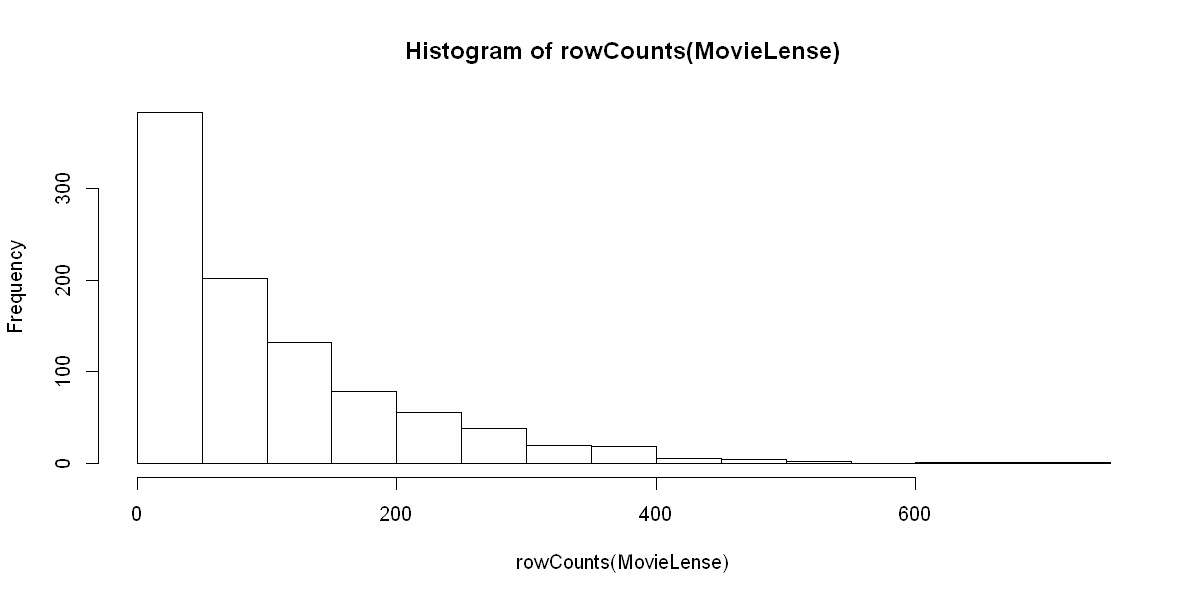

In [4]:
## Histograma del número de calificaciones por usuario
options(repr.plot.width=10, repr.plot.height=5)
hist(rowCounts(MovieLense)) 

La gráfica anterior muestra que la mayoría de los usuarios ha calificado entre 0-50 veces y esta tendencencia disminuye a medida que el número de calificaciones aumenta. Es decir, que un usuario no califica muchas películas.

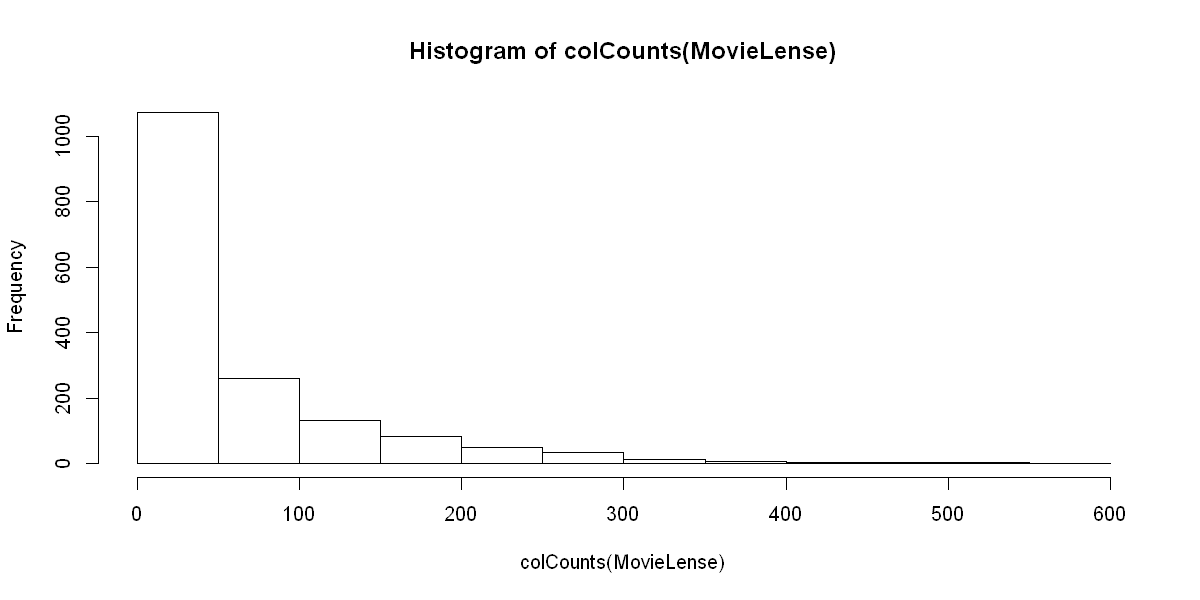

In [5]:
## Histograma del número de calificaciones por película
options(repr.plot.width=10, repr.plot.height=5)
hist(colCounts(MovieLense)) 

Similarmente, observe que una pelicula es más probable de tener entre 0-50 calificaciones, donde se evidencia una tendencia más marcada a disminuir la cantidad de peliculas cuando aumenta la cantidad de calificaciones. Es decir, existen pocas películas con una gran cantidad de calificación.

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   1.00    3.00    4.00    3.53    4.00    5.00 

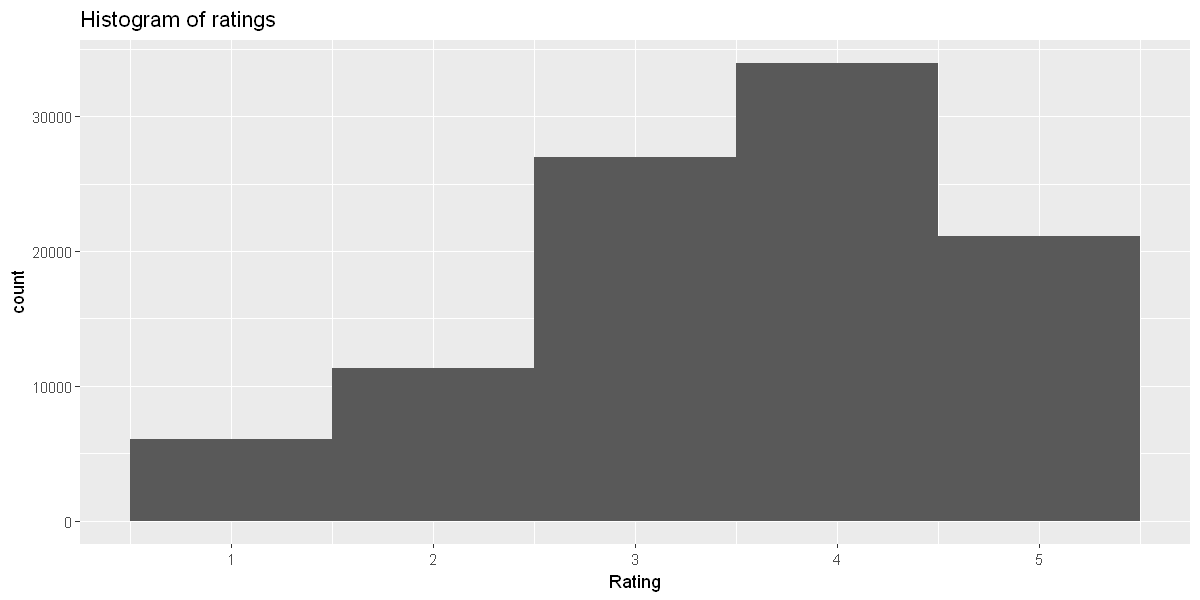

In [6]:
## Resumen e histograma de las calificaciones
## Histograma
options(repr.plot.width=10, repr.plot.height=5)

qplot(getRatings(MovieLense),           # Data
      binwidth = 1,                     # Amplitud de la barra
      main = "Histogram of ratings",    # Titulo del grafico
      xlab = "Rating")                  # Título del eje x

## Resumen
summary(getRatings(MovieLense))

Observe del histograma que la calificación que más se repite es *'4'*, donde la distribución está más sesgada hacia la derecha, es decir, hacia calificaciones positivas. Esto se observa en resumen donde la media corresponde a 3.53 y la mediana es 4.

In [7]:
## Calificación media (del promedio de calificación de cada usuario)
mean(rowMeans(MovieLense))

[1] 3.587565

Este dato muestra que en promedio, la calificación promedio de un usuario entre todas las peliculas que ve, es de 3.58. Difiere del promedio de todas las calificaciones que se vió anteriormente (3.53)

In [8]:
## Normalice la data
Norm <- normalize(MovieLense)
head(as(Norm[1,], "list")[[1]])

Toy Story (1995) 
                                           1.3948339 
                                    GoldenEye (1995) 
                                          -0.6051661 
                                   Four Rooms (1995) 
                                           0.3948339 
                                   Get Shorty (1995) 
                                          -0.6051661 
                                      Copycat (1995) 
                                          -0.6051661 
Shanghai Triad (Yao a yao yao dao waipo qiao) (1995) 
                                           1.3948339

Ya que los métodos de recomendación se basan en los métodos de clustering, como se vió en el Notebook de Clustering, es de suma importancia normalizar la data para poder tener medidas de distancias comparables y poder calcular cercanías. Por esto, normalice la data en distribución normal estándar (restando la media y diviendiendo sobre la desviación estándar).

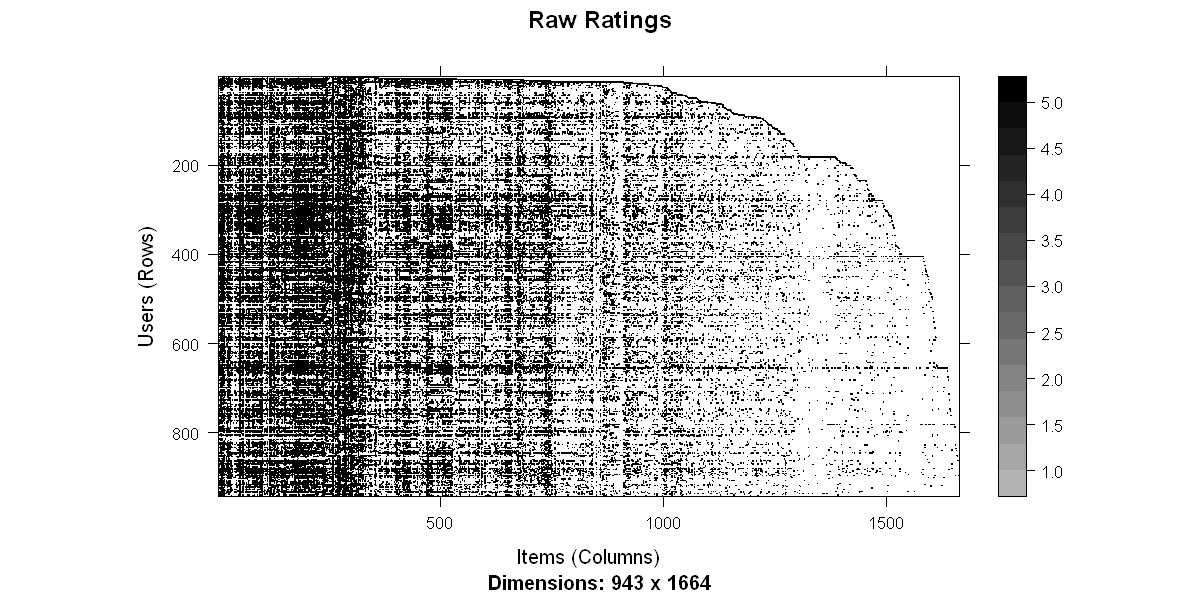

In [9]:
## Imagen de la matriz sparse de las calificaciones sin normalizar
image(MovieLense, main = "Raw Ratings")

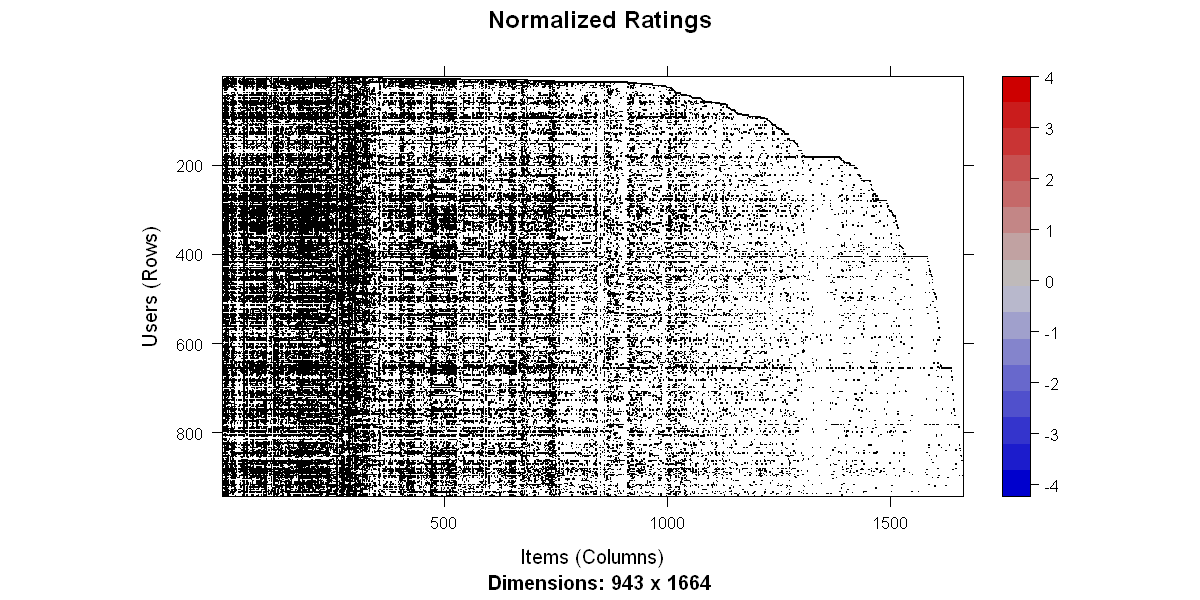

In [10]:
## Imagen de la matriz sparse de las calificaciones con normalización
image(Norm, main = "Normalized Ratings")

Las dos imagenes anteriores dejan claro, la forma de una matriz sparse ya que cada punto negro representa una calificación de un usuario a una pelicula (item). Note que la esquina superior derecha no presenta calificaciones, ya que pueden ser peliculas no tan populares dentro de los visitantes.

In [11]:
# Primeros seis filas de la matriz sparse normalizada.
head(getRatingMatrix(Norm))

   [[ suppressing 1664 column names 'Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)' ... ]]


6 x 1664 sparse Matrix of class "dgCMatrix"
                                                                          
1 1.3948339 -0.6051661 0.3948339 -0.6051661 -0.6051661 1.394834  0.3948339
2 0.2950820  .         .          .          .         .         .        
3 .          .         .          .          .         .         .        
4 .          .         .          .          .         .         .        
5 1.1257143  0.1257143 .          .          .         .         .        
6 0.3605769  .         .          .          .         .        -1.6394231
                                                                         
1 -2.6051661 1.3948339 -0.6051661 -1.6051661 1.3948339  1.394834 1.394834
2  .         .         -1.7049180  .         .          0.295082 0.295082
3  .         .          .          .         .          .        .       
4  .         .          .         -0.3043478 .          .        .       
5  .         .          .          .         .          .    

Note como dentro de los 6 primeros registros de la matriz sparse existen muchos valores en 0 (.)

In [12]:
## Datos de entrenamiento. (900 usuarios)
train <- MovieLense[1:900]

## Visualizamos la matriz de entrenamiento
head(getRatingMatrix(train))

   [[ suppressing 1664 column names 'Toy Story (1995)', 'GoldenEye (1995)', 'Four Rooms (1995)' ... ]]


6 x 1664 sparse Matrix of class "dgCMatrix"
                                                                               
1 5 3 4 3 3 5 4 1 5 3 2 5 5 5 5 5 3 4 5 4 1 4 4 3 4 3 2 4 1 3 3 5 4 2 1 2 2 3 4
2 4 . . . . . . . . 2 . . 4 4 . . . . 3 . . . . . 4 . . . . . . . . . . . . . .
3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
4 . . . . . . . . . . 4 . . . . . . . . . . . . . . . . . . . . . . . . . . . .
5 4 3 . . . . . . . . . . . . . . 4 . . . 3 . . 4 3 . . . 4 . . . . . . . . . .
6 4 . . . . . 2 4 4 . . 4 2 5 3 . . . 4 . 3 3 4 . . . . 2 . . . 4 . . . . . . .
                                                                               
1 3 2 5 4 5 5 4 4 5 3 5 4 4 3 3 5 4 5 4 5 5 4 3 2 5 4 4 3 4 3 3 3 4 3 1 4 4 4 1
2 . . . . . . . . . . 5 . . . . . . . . . . . . . . . . . . . . . . . . . . . .
3 . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . . .
4 . . . . . . . . . . 5 . . . . . . . . . . . . . . . . . . . . . . . . . . 

Dentro del ejemplo, utilice la matriz sin normalizar para realizar el recomendador. Puede utilizar la matriz normalizada para mirar como cambian los resultados.

In [13]:
### Recomendador basado en filtrado colaborativo basado en usuarios
rec <- Recommender(train,            # Datos de entrenamiento
                   method = "UBCF")  # Metodo: Basado en Usuarios

rec                                  # Objeto recomendador

Recommender of type 'UBCF' for 'realRatingMatrix' 
learned using 900 users.

In [14]:
### Recomendador basado en filtrado colaborativo basado en items
rec1<-Recommender(train,   # Datos de entrenamiento
                  "IBCF")  # Metodo: Basado en Usuarios

rec1                       # Objeto recomendador

Recommender of type 'IBCF' for 'realRatingMatrix' 
learned using 900 users.

Se entrenan los dos modelos, basados en usuarios e items. 

In [15]:
### Realice las N recomendaciones para los otros usuarios con el metodo de usuarios
pre <- predict(rec,                   # Recomendador
               MovieLense[901:943],   # Datos de evaluación
               n = 5)                 # Número de recomendaciones por usuario

pre                                   # Objeto de recomendaciones

## Visualizamos las 5 recomendaciones para cada usuario
as(pre,                               # Recomendaciones
   "list")                            # como lista

Recommendations as 'topNList' with n = 5 for 43 users. 

$`901`
[1] "Fugitive, The (1993)"             "Shawshank Redemption, The (1994)"
[3] "It's a Wonderful Life (1946)"     "Princess Bride, The (1987)"      
[5] "Schindler's List (1993)"         

$`902`
[1] "Raiders of the Lost Ark (1981)"    "Terminator 2: Judgment Day (1991)"
[3] "Forrest Gump (1994)"               "Silence of the Lambs, The (1991)" 
[5] "Blade Runner (1982)"              

$`903`
[1] "Empire Strikes Back, The (1980)"                                            
[2] "2001: A Space Odyssey (1968)"                                               
[3] "Dr. Strangelove or: How I Learned to Stop Worrying and Love the Bomb (1963)"
[4] "Rear Window (1954)"                                                         
[5] "Monty Python and the Holy Grail (1974)"                                     

$`904`
[1] "Star Wars (1977)"              "Titanic (1997)"               
[3] "Toy Story (1995)"              "Time to Kill, A (1996)"       
[5] "Independence Day (ID4) (1996)"

$`905`
[1] "Good Will Hunting (1997)" "Full Monty, The (1997)"  
[3] "Scream (1996)"            "Apt Pupil (1998)"        
[5] "Star Wars (1977)"        

$`906`
[1] "Contact (1997)"           "Titanic (1997)"          
[3] "L.A. Confidential (1997)" "Antonia's Line (1995)"   
[5] "Big Night (1996)"        

$`907`
[1] "Shawshank Redemption, The (1994)" "Usual Suspects, The (1995)"      
[3] "Braveheart (1995)"                "Top Gun (1986)"                  
[5] "In the Line of Fire (1993)"      

$`908`
[1] "Shawshank Redemption, The (1994)" "Dances with Wolves (1990)"       
[3] "North by Northwest (1959)"        "Citizen Kane (1941)"             
[5] "Wizard of Oz, The (1939)"        

$`909`
[1] "Star Wars (1977)"          "L.A. Confidential (1997)" 
[3] "Titanic (1997)"            "Kolya (1996)"             
[5] "Return of the Jedi (1983)"

$`910`
[1] "Boot, Das (1981)"                 "L.A. Confidential (1997)"        
[3] "Schindler's List (1993)"          "Contact (1997)"                  
[5] "Shawshank Redemption, The (1994)"

$`911`
[1] "Fargo (1996)"            "Star Wars (1977)"       
[3] "Contact (1997)"          "Godfather, The (1972)"  
[5] "Schindler's List (1993)"

$`912`
[1] "Terminator 2: Judgment Day (1991)" "Silence of the Lambs, The (1991)" 
[3] "Usual Suspects, The (1995)"        "Sleepless in Seattle (1993)"      
[5] "Amadeus (1984)"                   

$`913`
[1] "Lawrence of Arabia (1962)"      "Godfather: Part II, The (1974)"
[3] "GoodFellas (1990)"              "Glory (1989)"                  
[5] "Good Will Hunting (1997)"      

$`914`
[1] "Star Wars (1977)"                 "Sting, The (1973)"               
[3] "Fugitive, The (1993)"             "Shawshank Redemption, The (1994)"
[5] "Fargo (1996)"                    

$`915`
[1] "Good Will Hunting (1997)"   "Full Monty, The (1997)"    
[3] "As Good As It Gets (1997)"  "Welcome To Sarajevo (1997)"
[5] "Postman, The (1997)"       

$`916`
[1] "Godfather, The (1972)"                 
[2] "One Flew Over the Cuckoo's Nest (1975)"
[3] "Amadeus (1984)"                        
[4] "Chinatown (1974)"                      
[5] "Glory (1989)"                          

$`917`
[1] "English Patient, The (1996)" "Contact (1997)"             
[3] "Return of the Jedi (1983)"   "Postino, Il (1994)"         
[5] "Titanic (1997)"             

$`918`
[1] "Fargo (1996)"                "English Patient, The (1996)"
[3] "Schindler's List (1993)"     "Sting, The (1973)"          
[5] "Casablanca (1942)"          

$`919`
[1] "Full Monty, The (1997)" "Godfather, The (1972)"  "Close Shave, A (1995)" 
[4] "Hoop Dreams (1994)"     "Pulp Fiction (1994)"   

$`920`
[1] "Apt Pupil (1998)"            "Full Monty, The (1997)"     
[3] "As Good As It Gets (1997)"   "Sweet Hereafter, The (1997)"
[5] "Amistad (1997)"             

$`921`
[1] "Shawshank Redemption, The (1994)" "Contact (1997)"                  
[3] "Back to the Future (1985)"        "Silence of the Lambs, The (1991)"
[5] "It's a Wonder

In [16]:
### Realice las N recomendaciones para los otros usuarios con el metodo de items
pre1 <- predict(rec1,                  # Recomendador
               MovieLense[901:943],    # Datos de evaluación
               n = 5)                  # Número de recomendaciones por usuario

pre1                                   # Objeto de recomendaciones

## Visualizamos las 5 recomendaciones para cada usuario
as(pre1,                               # Recomendaciones
   "list")                             # como lista

Recommendations as 'topNList' with n = 5 for 43 users. 

$`901`
[1] "Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)"
[2] "French Twist (Gazon maudit) (1995)"                  
[3] "From Dusk Till Dawn (1996)"                          
[4] "Birdcage, The (1996)"                                
[5] "Belle de jour (1967)"                                

$`902`
[1] "Four Rooms (1995)"        "Crimson Tide (1995)"     
[3] "Outbreak (1995)"          "Professional, The (1994)"
[5] "Stargate (1994)"         

$`903`
[1] "To Wong Foo, Thanks for Everything! Julie Newmar (1995)"
[2] "Outbreak (1995)"                                        
[3] "Free Willy (1993)"                                      
[4] "True Romance (1993)"                                    
[5] "Wizard of Oz, The (1939)"                               

$`904`
[1] "GoldenEye (1995)"                "Birdcage, The (1996)"           
[3] "Outbreak (1995)"                 "Moll Flanders (1996)"           
[5] "Bedknobs and Broomsticks (1971)"

$`905`
[1] "Kolya (1996)"             "Bean (1997)"             
[3] "Apt Pupil (1998)"         "Good Will Hunting (1997)"
[5] "Jackie Brown (1997)"     

$`906`
[1] "Kolya (1996)"                    "In & Out (1997)"                
[3] "Ice Storm, The (1997)"           "Everyone Says I Love You (1996)"
[5] "Wings of Desire (1987)"         

$`907`
[1] "French Twist (Gazon maudit) (1995)"                     
[2] "From Dusk Till Dawn (1996)"                             
[3] "Bad Boys (1995)"                                        
[4] "Crumb (1994)"                                           
[5] "To Wong Foo, Thanks for Everything! Julie Newmar (1995)"

$`908`
[1] "To Wong Foo, Thanks for Everything! Julie Newmar (1995)"
[2] "Hot Shots! Part Deux (1993)"                            
[3] "Remains of the Day, The (1993)"                         
[4] "Bedknobs and Broomsticks (1971)"                        
[5] "Stand by Me (1986)"                                     

$`909`
[1] "Mighty Aphrodite (1995)"                
[2] "Mr. Holland's Opus (1995)"              
[3] "Antonia's Line (1995)"                  
[4] "Free Willy 2: The Adventure Home (1995)"
[5] "Eat Drink Man Woman (1994)"             

$`910`
[1] "Much Ado About Nothing (1993)"         
[2] "Sting, The (1973)"                     
[3] "Young Frankenstein (1974)"             
[4] "Bridges of Madison County, The (1995)" 
[5] "Aladdin and the King of Thieves (1996)"

$`911`
[1] "Richard III (1995)"       "Mighty Aphrodite (1995)" 
[3] "Bad Boys (1995)"          "Strange Days (1995)"     
[5] "Santa Clause, The (1994)"

$`912`
[1] "GoldenEye (1995)"                "Outbreak (1995)"                
[3] "Hot Shots! Part Deux (1993)"     "Basic Instinct (1992)"          
[5] "Star Trek: First Contact (1996)"

$`913`
[1] "Angels and Insects (1995)"             
[2] "Mask, The (1994)"                      
[3] "Nightmare Before Christmas, The (1993)"
[4] "Maya Lin: A Strong Clear Vision (1994)"
[5] "Breaking the Waves (1996)"             

$`914`
[1] "True Romance (1993)"         "D3: The Mighty Ducks (1996)"
[3] "Swingers (1996)"             "On Golden Pond (1981)"      
[5] "Abyss, The (1989)"          

$`915`
[1] "Afterglow (1997)"          "Family Thing, A (1996)"   
[3] "Mighty Aphrodite (1995)"   "Postino, Il (1994)"       
[5] "Mr. Holland's Opus (1995)"

$`916`
[1] "Horseman on the Roof, The (Hussard sur le toit, Le) (1995)"
[2] "Ridicule (1996)"                                           
[3] "Kolya (1996)"                                              
[4] "Apple Dumpling Gang, The (1975)"                           
[5] "Apartment, The (1960)"                                     

$`917`
[1] "Angels and Insects (1995)"                     
[2] "Hoop Dreams (1994)"                            
[3] "Professional, The (1994)"                      
[4] "Robert A. Heinlein's The Puppet Masters (1994)"
[5] "Spitfire Grill, The (1996)"                    

$`918`
[1] "Shanghai Triad (Yao a yao yao dao waipo qiao) (1995)"   

Se calculan las predicciones como las 5 recomendaciones para cada usuario. Recuerde que este algoritmo coloca a cada usuario en un cluster y realiza una recomendaciones basado en la media de los ratings de cada cluster.

In [17]:
## Observe las posibilidades que se tienen para estimar los recomendadores
recommenderRegistry$get_entries(dataType = "realRatingMatrix")

$ALS_realRatingMatrix
Recommender method: ALS for realRatingMatrix
Description: Recommender for explicit ratings based on latent factors, calculated by alternating least squares algorithm.
Reference: Yunhong Zhou, Dennis Wilkinson, Robert Schreiber, Rong Pan (2008). Large-Scale Parallel Collaborative Filtering for the Netflix Prize, 4th Int'l Conf. Algorithmic Aspects in Information and Management, LNCS 5034.
Parameters:
  normalize lambda n_factors n_iterations min_item_nr seed
1      NULL    0.1        10           10           1 NULL

$ALS_implicit_realRatingMatrix
Recommender method: ALS_implicit for realRatingMatrix
Description: Recommender for implicit data based on latent factors, calculated by alternating least squares algorithm.
Reference: Yifan Hu, Yehuda Koren, Chris Volinsky (2008). Collaborative Filtering for Implicit Feedback Datasets, ICDM '08 Proceedings of the 2008 Eighth IEEE International Conference on Data Mining, pages 263-272.
Parameters:
  lambda alpha n_factors 

Observe que existen varios métodos para estimar los recomendadores. Entre estos están los más populares basados en usuarios e items. No obstante se encuentran los ALS, SVD, aleatorio, popular o el re-recomendar. 

In [18]:
## Crear un esquema para evaluar los diferentes algoritmos
scheme <- evaluationScheme(MovieLense,        # Datos
                           method = "split",  # Dividir la data
                           train = .9,        # 90% de entrenamiento y 10 de validación
                           k = 1,             # Numero de veces para correr la evaluación
                           given = 10,        # Número de items para cada observación
                           goodRating = 4)    # Límite inferiro donde se considera un buen rating

scheme

Evaluation scheme with 10 items given
Method: 'split' with 1 run(s).
Training set proportion: 0.900
Good ratings: >=4.000000
Data set: 943 x 1664 rating matrix of class 'realRatingMatrix' with 99392 ratings.

In [19]:
## Algoritmos a evaluar con sus parámetros
algorithms <- list(
    "random items" = list(name="RANDOM",                                   # Algoritmo Random
                        param=list(normalize = "Z-score")),                # Normalización Z-score
  
    "popular items" = list(name="POPULAR",                                 # Algoritmo Popular
                         param=list(normalize = "Z-score")),               # Normalización Z-score
  
    "user-based CF" = list(name="UBCF",                                    # Algoritmo Usuario
                         param=list(normalize = "Z-score",                 # Normalizacion Z-score  
                                    method="Cosine",                       # Distancias metodo coseno
                                    nn=50)),                               # Numero de clusters
    
    "item-based CF" = list(name="IBCF",                                    # Algortimo Items
                         param=list(normalize = "Z-score"))                # Normalización Z-score
  )

Para mirar el performance de los diferentes algoritmos, utilizamos un esquema de evaluación para entrenar y medir los algortimos de ***User, Item, Popular y Aleatorio***

In [20]:
# Correr los algoritmos con n recomendaciones de peliculas
results <- evaluate(scheme,                     # Esquema de evaluación
                    algorithms,                 # Algoritmos
                    n=c(1, 3, 5, 10, 15, 20))   # n recomendaciones

# Visualice resultados
head(results)

RANDOM run fold/sample [model time/prediction time]
	 1  [0sec/0.35sec] 
POPULAR run fold/sample [model time/prediction time]
	 1  [0.06sec/0.52sec] 
UBCF run fold/sample [model time/prediction time]
	 1  [0.07sec/1.72sec] 
IBCF run fold/sample [model time/prediction time]
	 1  [74.36sec/0.22sec] 


Warning message in names(l) <- names(x)[i]:
"class 'evaluationResultList' has no 'names' slot; assigning a names attribute will create an invalid object"

List of evaluation results for 4 recommenders:
Evaluation results for 1 folds/samples using method 'RANDOM'.
Evaluation results for 1 folds/samples using method 'POPULAR'.
Evaluation results for 1 folds/samples using method 'UBCF'.
Evaluation results for 1 folds/samples using method 'IBCF'.

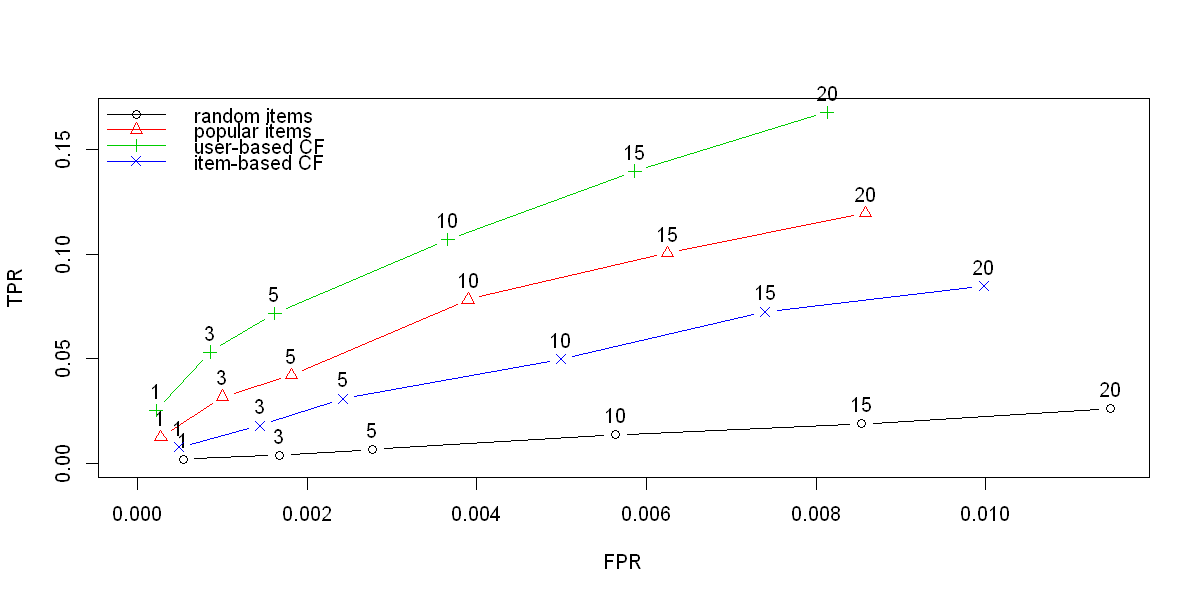

In [21]:
# Grafique la curva ROC 
options(repr.plot.width=10, repr.plot.height=5)

plot(results,           # Resultados del esquema
     annotate = 1:4,    # Poner recomendaciones en las lineas
     legend="topleft")  # Leyenda

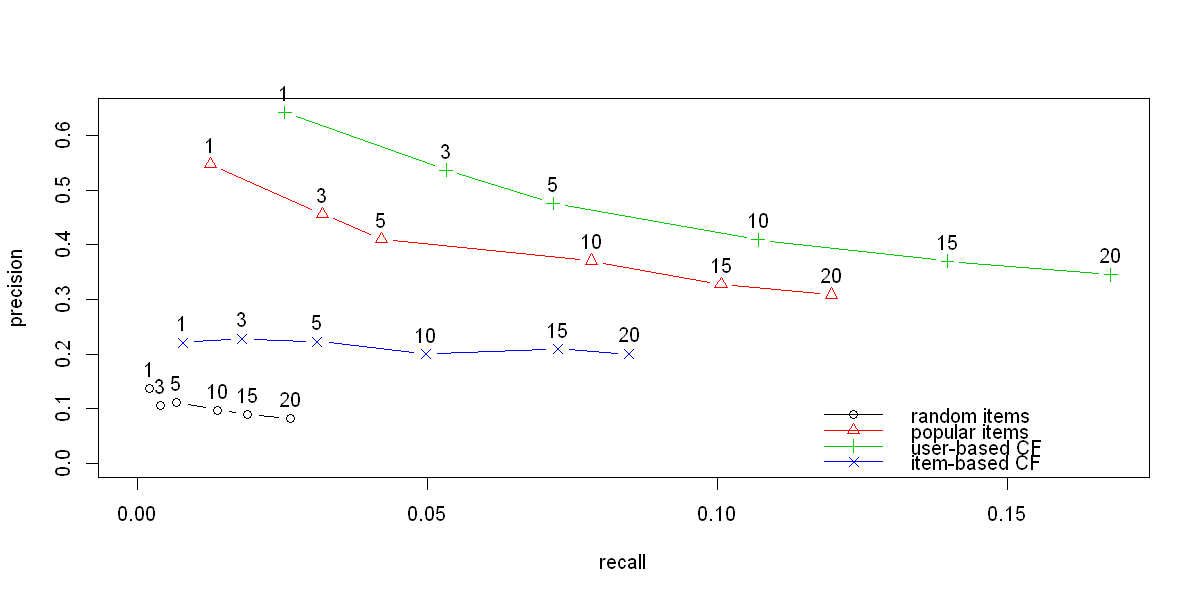

In [22]:
## Observe la relación entre precision y recall
options(repr.plot.width=10, repr.plot.height=5)
plot(results,       # Resultados del esquema de evaluación 
     "prec/rec",    # Precisión - Recall
     annotate=1:4)  # Poner recomendaciones en las lineas

Puede observar que dentro de las metricas que se evaluaron el algortimo que mayor tuvo desemepeño es el ***User-based***, ya que es aquel que tiene mejor relación entre TPR y FPR. Además, es aquel que tiene mejor relación entre precision-recall.

Es interesante que note cómo el algortimo de Popular supera al algoritmo basado en items. Esto puede deberse a que cierto tipos de algoritmos funcionan mejor abarcando un tipo de problema especifico que otros. 

Recuerde que las metricas ROC se definen de la siguiente manera.

<img src="images/ROC.png" height="600" width="600">

---

**Ejercicio.--** Utilice los del restaurante Entree de Chicago. En esta data un cliente puede usar un restaurante de cualquier ciudad y siempre recibirán recomendaciones de los restaurantes. El cliente puede calificar el restaurante. Su objetivo es utilizar este dataset para contruir el mejor recomendador que permita recomendarle a un cliente cualquiera el (los) restaurante(s) que debe ir.

[Datos](https://archive.ics.uci.edu/ml/machine-learning-databases/entree-mld/entree_data.tar.gz)

---

[Contenido](#Contenido)